In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("titles.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

<AxesSubplot:>

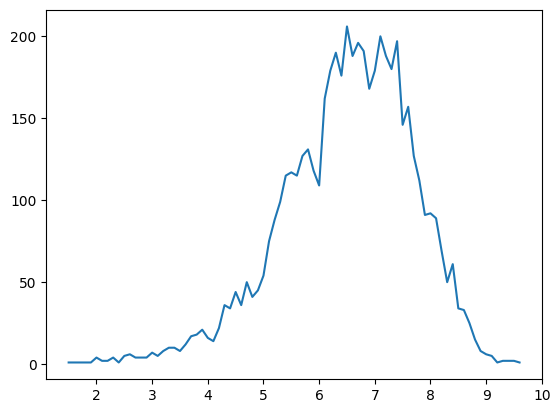

In [41]:
df['imdb_score'].value_counts().sort_index().plot.line()

Mediante este grafico, se puede ver que la media de la puntuacion se encuentra entre 6 y 8 puntos, si se toma como parametro la puntuacion IMDB, se puede decir que el contenido presentado por la plataforma suele ser de buena calidad en general.

C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == "__main__":


<AxesSubplot:>

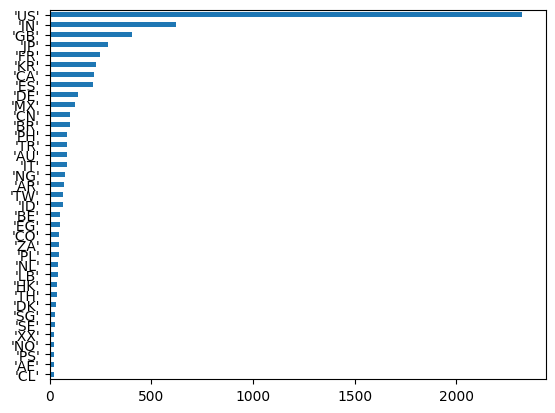

In [46]:
#Limpieza de columna countries
from turtle import width


countries = df['production_countries']
countries = countries.astype("string")
countries = countries.str.replace("[","")
countries = countries.str.replace(" ","")
countries = countries.str.replace("]","")
countries = countries.str.split(",",expand=True)

#Agrego todos los generos en una sola columna, en el df original, peliculas con mas de un pais en esta columna
countries_sumados = pd.Series("string")
for col in countries:
    countries_sumados = pd.concat([countries_sumados,countries[col]], ignore_index=True)
    
#Quito los varoles nulos y datos incongruentes
countries_sumados = countries_sumados.astype("string")
countries_sumados.sort_values()
countries_sumados = countries_sumados[countries_sumados != "NA"]
countries_sumados = countries_sumados[countries_sumados != "string"]
countries_sumados = countries_sumados[countries_sumados != ""]

#Creo una serie con las sumas ya hechas y, como son muchos los paises con producciones, me quedo solamente con lo que presenten mas de 20
#para poder realizar una mejor visualizacion.
sumatoria = countries_sumados.value_counts()
sumatoria = sumatoria[sumatoria >= 20]

#Grafico los paises
sumatoria.sort_values().plot.barh()




En este grafico se puede ver una clara ponderancia de Estados Unidos en la creacion de contenido, seguido por India, Gran Bretaña y Japon.

C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
C:\Users\Sureliano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


<AxesSubplot:>

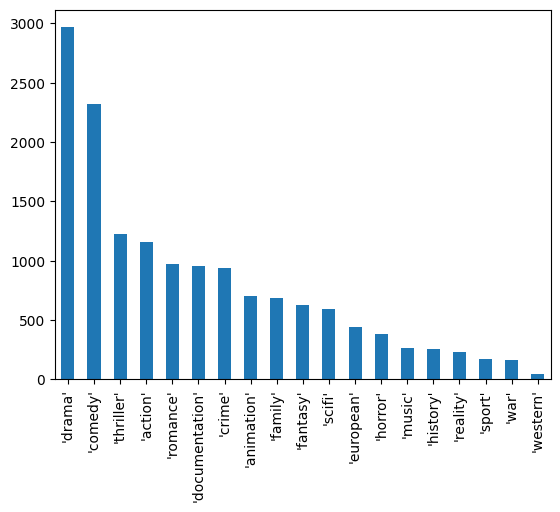

In [48]:
#Limpieza de columna generos
generos = df['genres']
generos = generos.astype("string")
generos = generos.str.replace("[","")
generos = generos.str.replace(" ","")
generos = generos.str.replace("]","")
generos = generos.str.split(",",expand=True)
#Agrego todos los generos en una sola columna, en el df original, peliculas con mas de un genero en esta columna
generos_sumados = pd.Series("string")
for col in generos:
    generos_sumados = pd.concat([generos_sumados,generos[col]], ignore_index=True)
#Quito los varoles nulos y datos incongruentes
generos_sumados = generos_sumados.astype("string")
generos_sumados.sort_values()
generos_sumados = generos_sumados[generos_sumados != "<NA>"]
generos_sumados = generos_sumados[generos_sumados != "string"]
generos_sumados = generos_sumados[generos_sumados != ""]

#Grafico los generos
generos_sumados.value_counts().sort_values(ascending=False).plot.bar()

Dentro de la distribucion de generos, hay una clara ponderancia de los generos de Drama y Comedia dentro de las tematicas elegidas para los contenidos.